In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

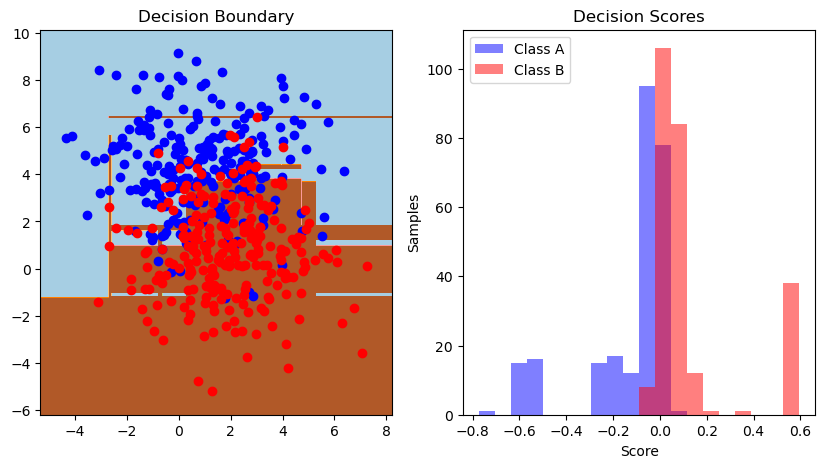

Mean Accuracy =0.858000


In [15]:
plot_colors = "br"
plot_step = 0.02
class_names = "AB"
tree = DecisionTreeClassifier()
boost = AdaBoostClassifier()
X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=2)
boost.fit(X, y)
plt.figure(figsize=(10, 5))

#Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = boost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, cmap=plt.cm.Paired, label="Class %s" %n)
plt.title('Decision Boundary')

twoclass_output = boost.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)

for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y==i], bins=20, range=plot_range,
             facecolor=c, label='Class %s' %n, alpha = .5)

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2))
plt.legend(loc='upper left')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')
plt.show()
print("Mean Accuracy =%f" % boost.score(X,y))